# Cryptocurrency Fundamentals Analysis

Purpose:
    - Explore relationships between cryptocurrency git/github repositoriy activity and price/volatility 
    

### Load Fundamentals Data

The fundamentals data is accessible through the database that this repository's worker maintains. Update `config.py` with the database url for the source data

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
frames = {}
path = 'Desktop/github_data/'
for filename in os.listdir(path):
    coin = filename.split('.')[0]
    frames[coin] = pd.read_csv(path + filename)

In [4]:
baseDate = datetime.datetime(2017, 6, 1)
date_list = [baseDate - datetime.timedelta(days=x) for x in range(0, 265)]
for coin, df in frames.items():
    frames[coin]['ds'] = [np.datetime64('2017-06-01') + np.timedelta64(num_dates,'D') for num_dates in range(len(frames[coin]))]

# Prophet Plots

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonal

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


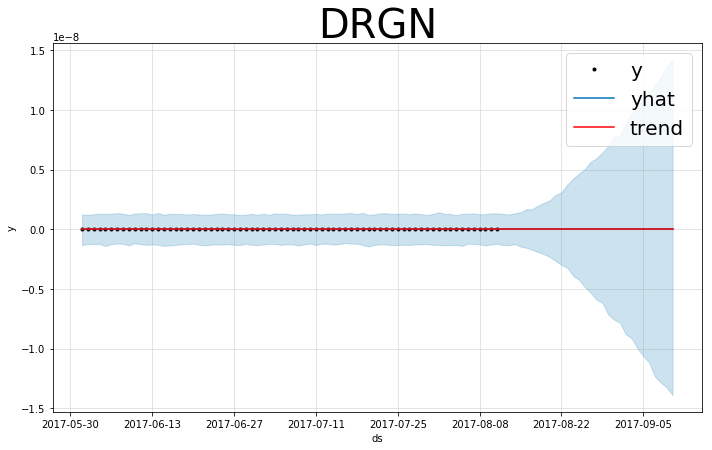

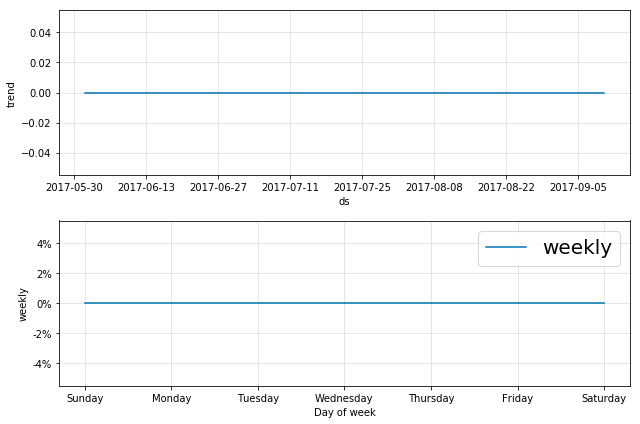

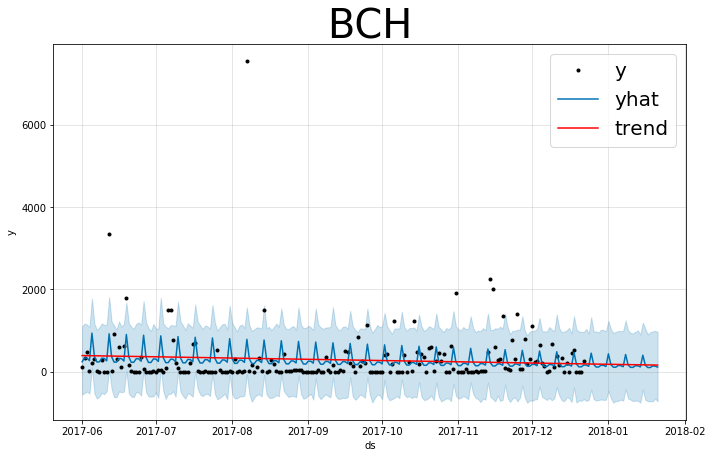

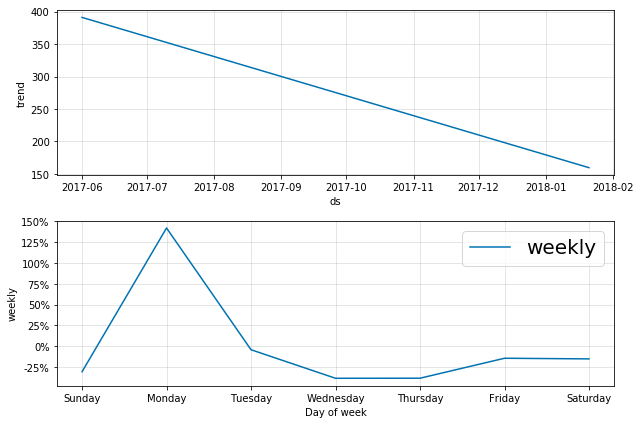

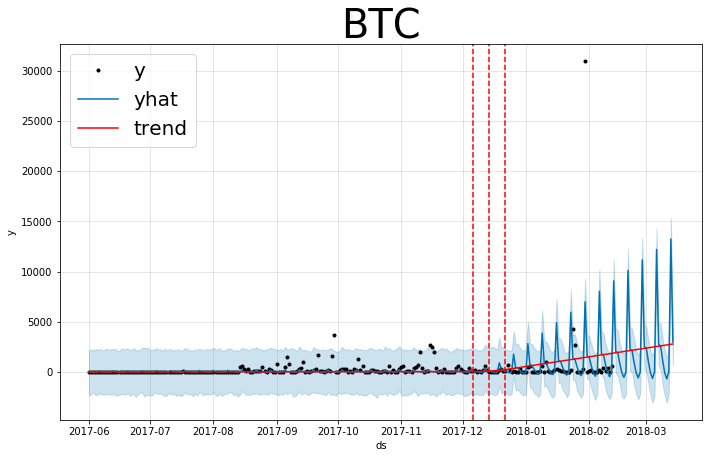

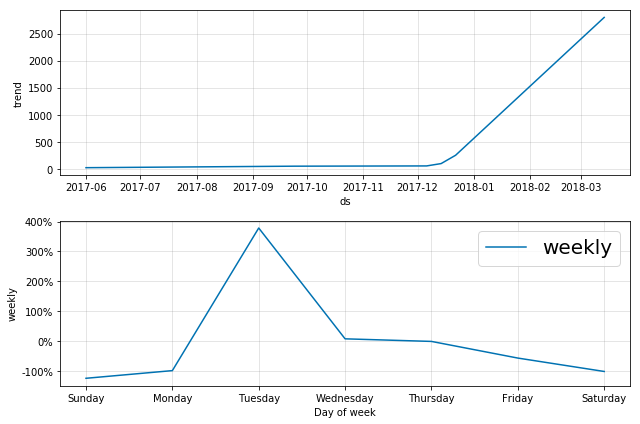

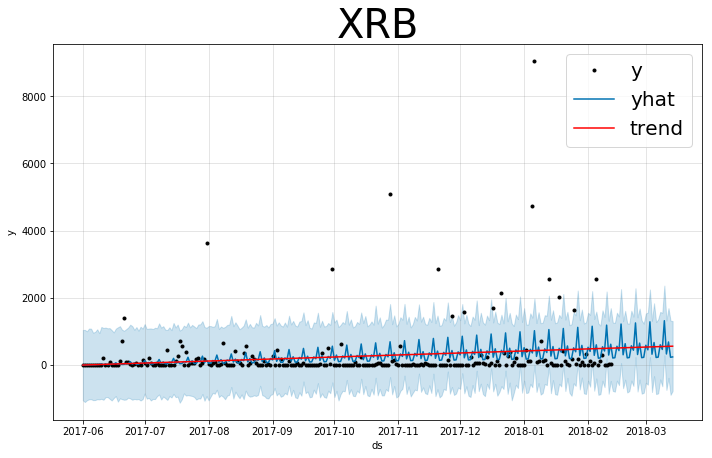

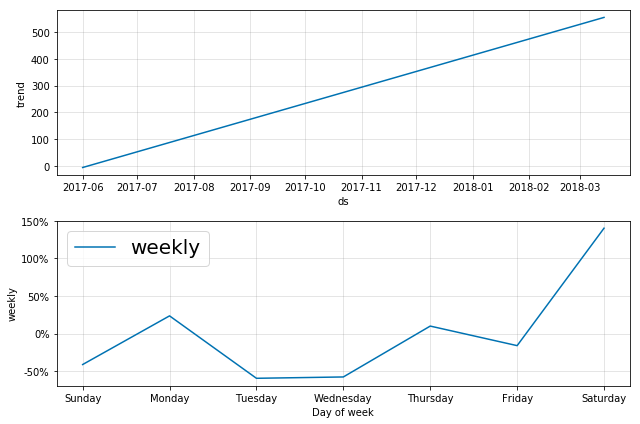

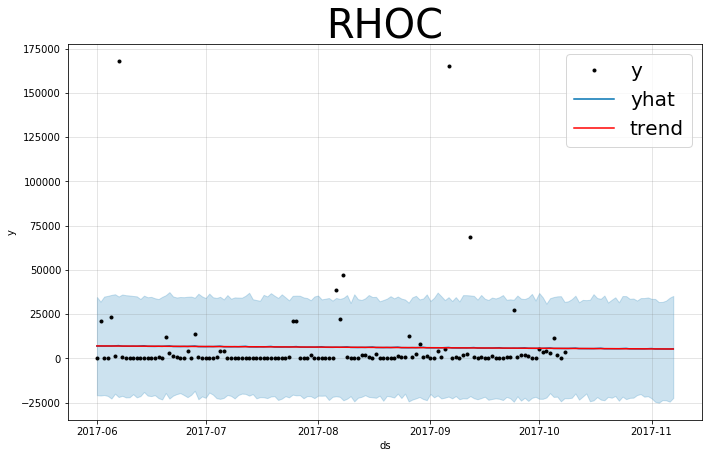

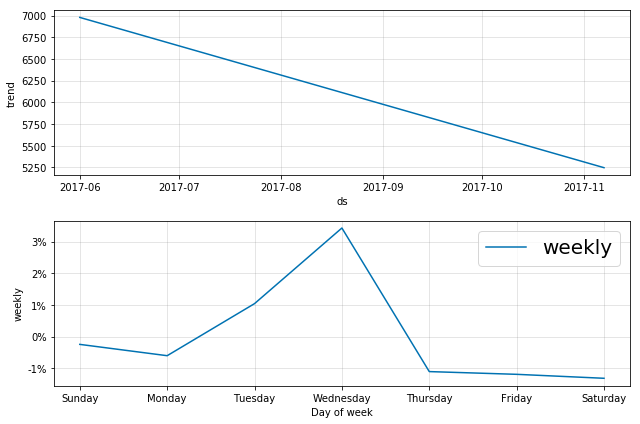

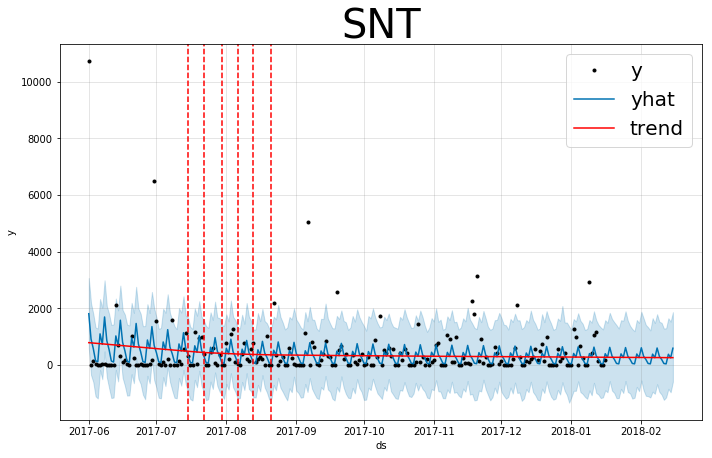

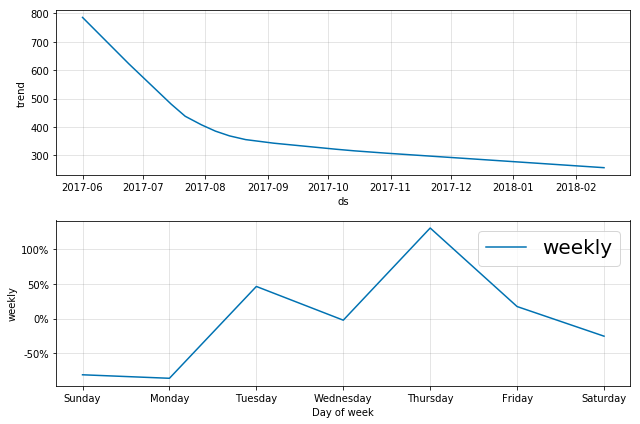

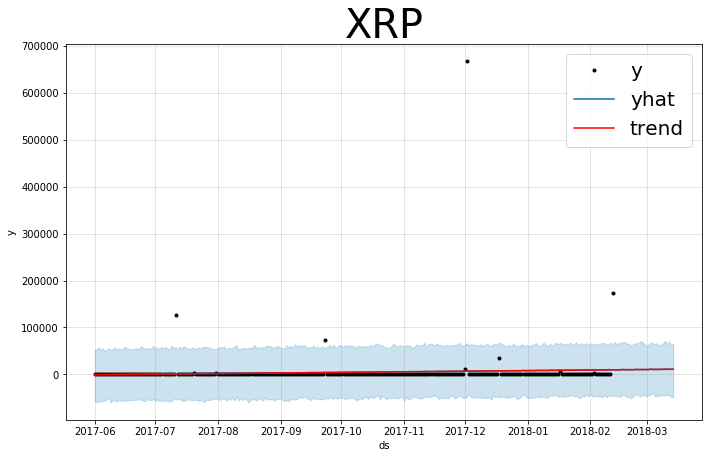

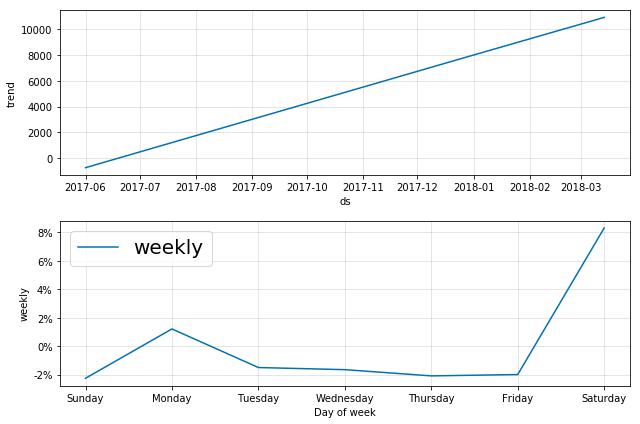

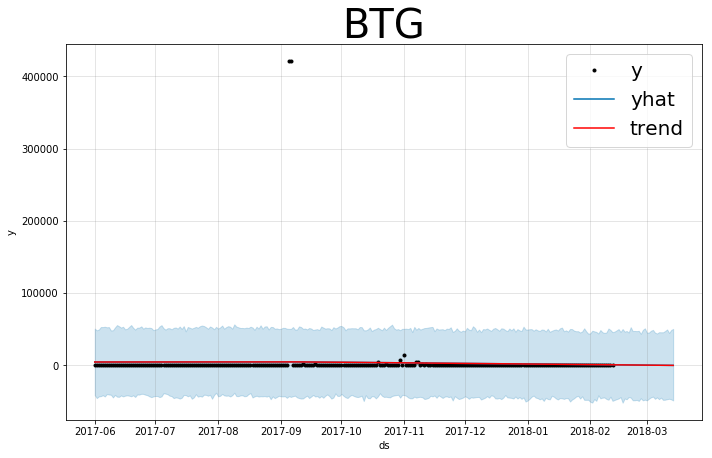

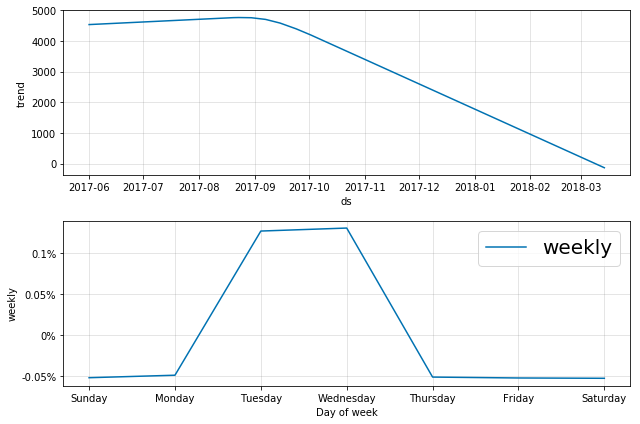

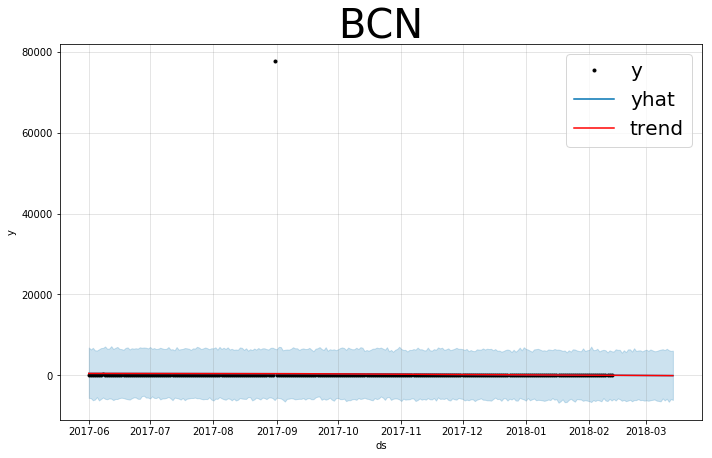

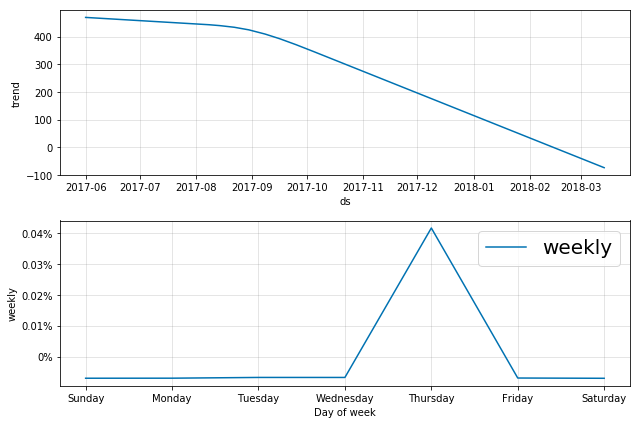

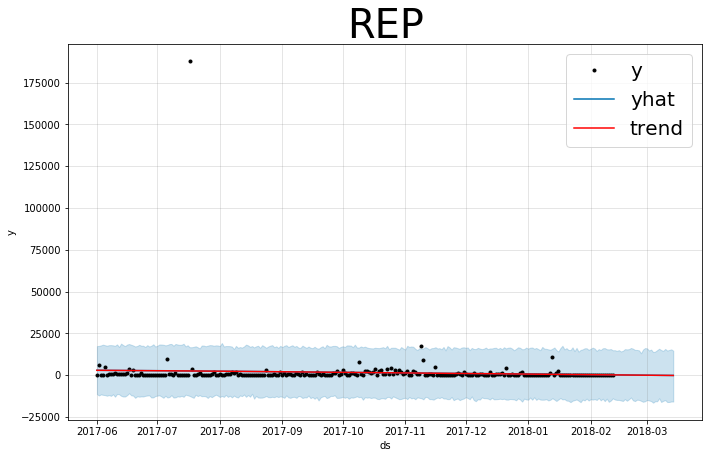

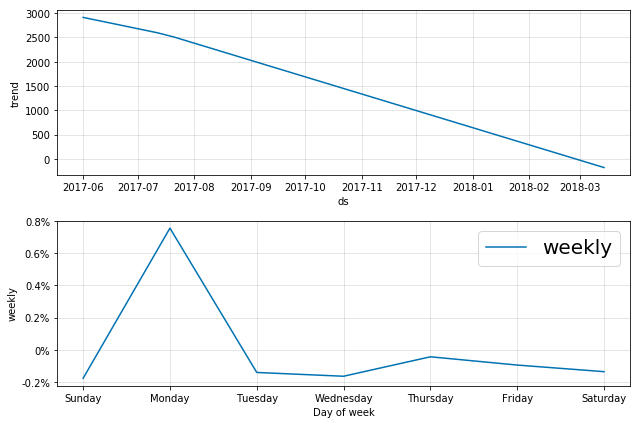

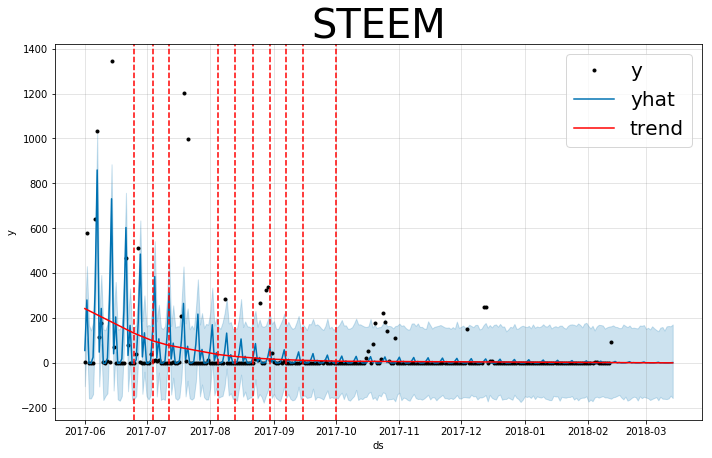

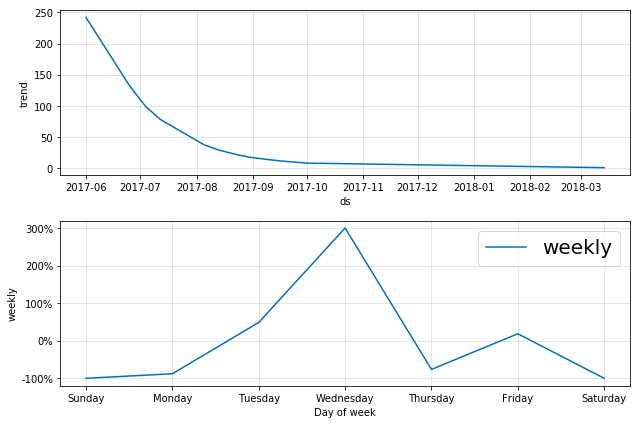

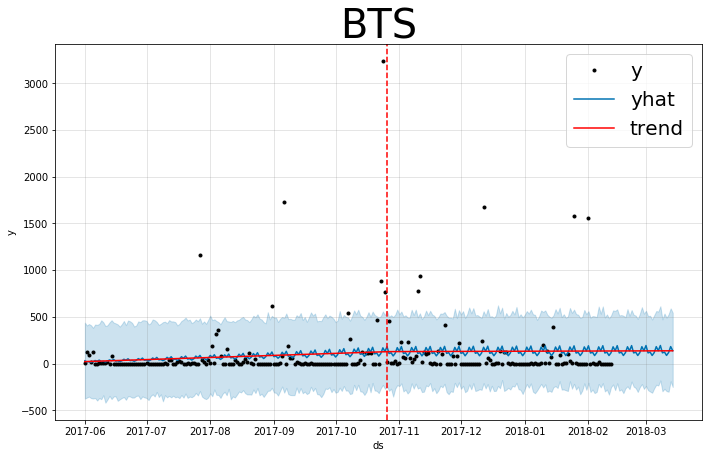

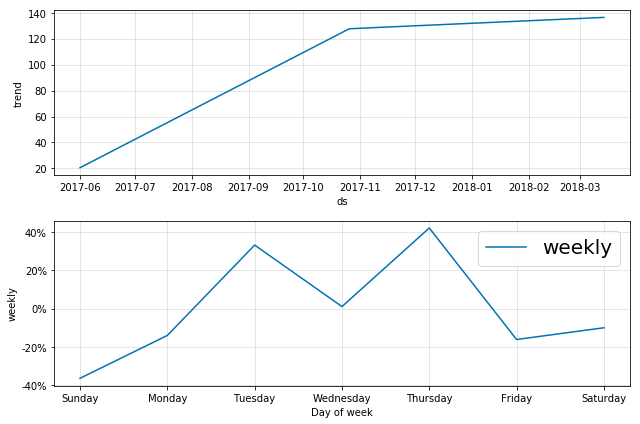

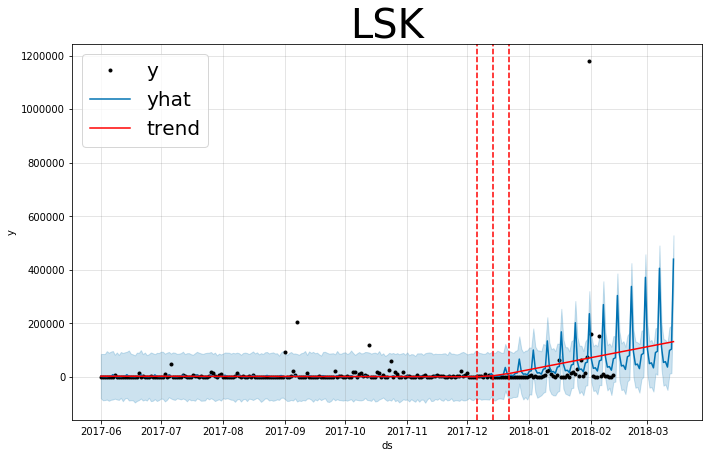

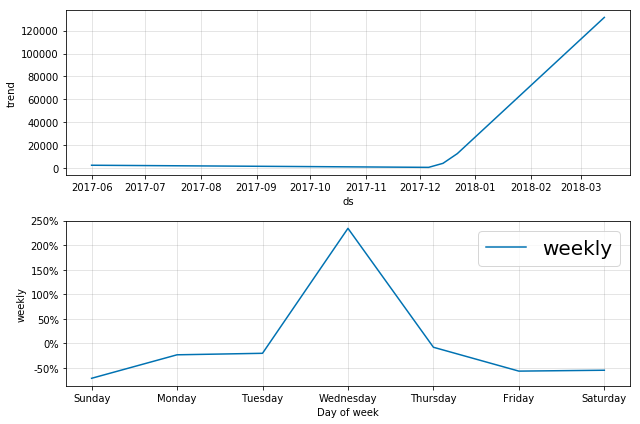

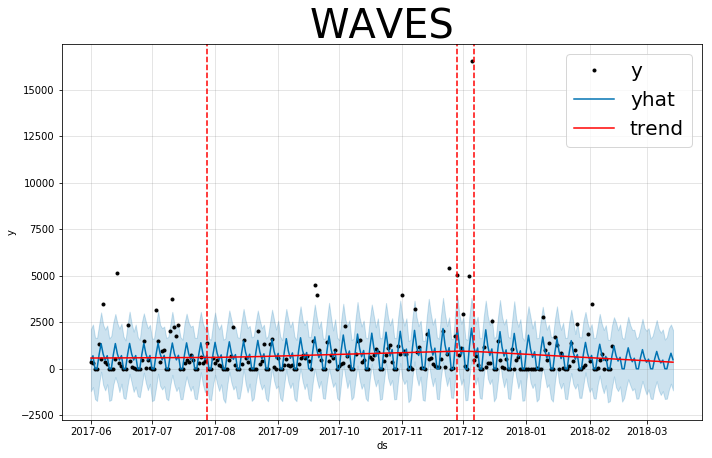

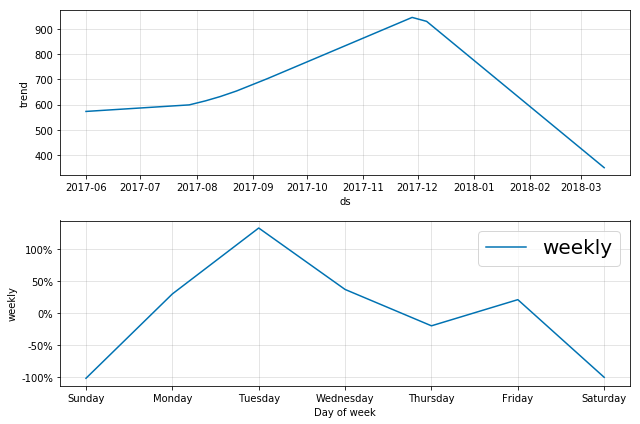

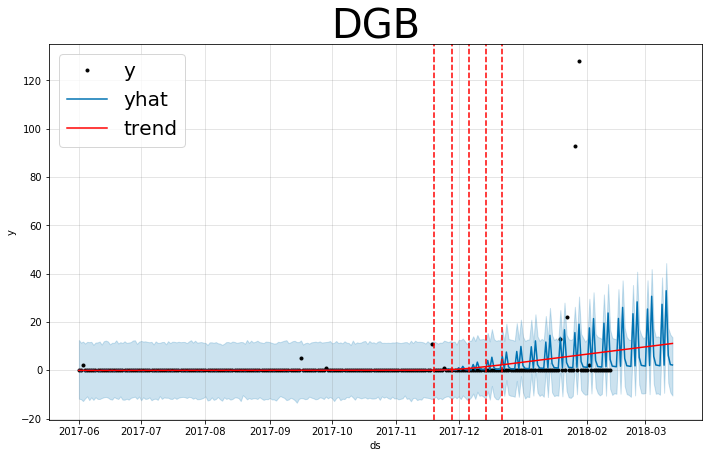

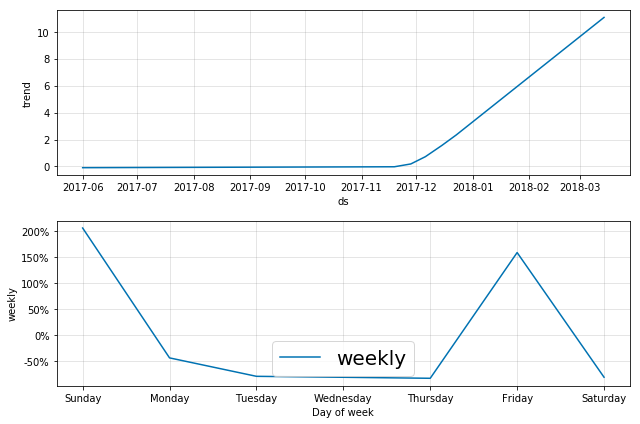

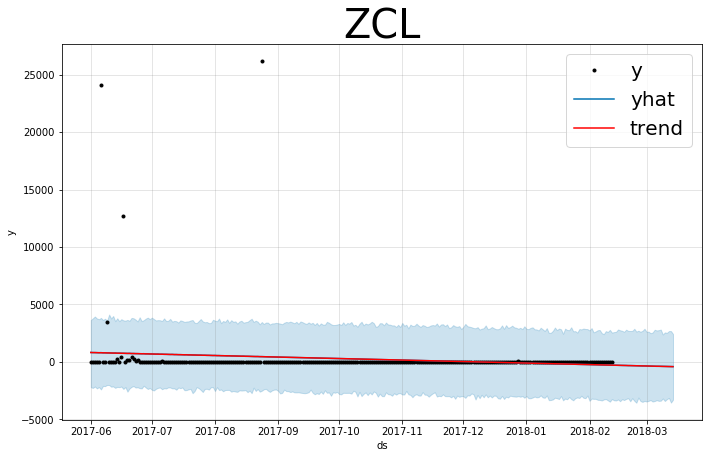

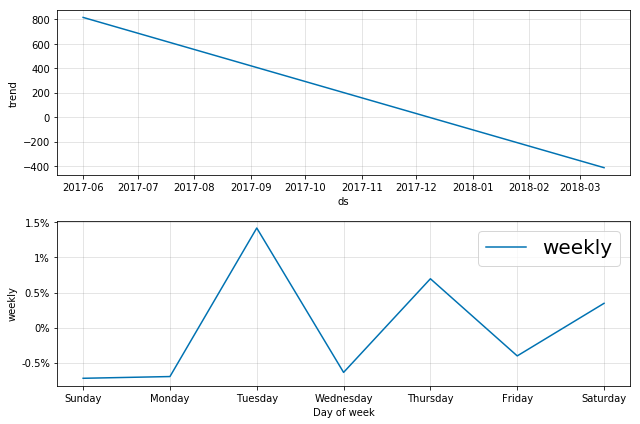

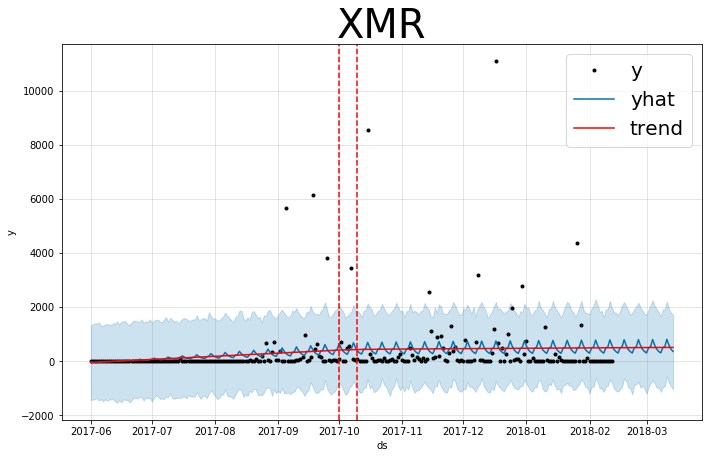

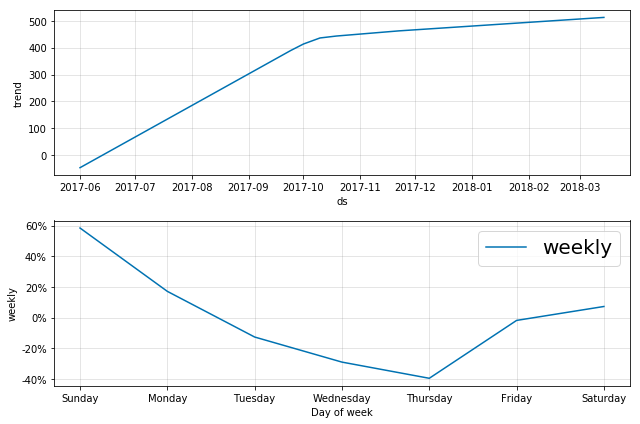

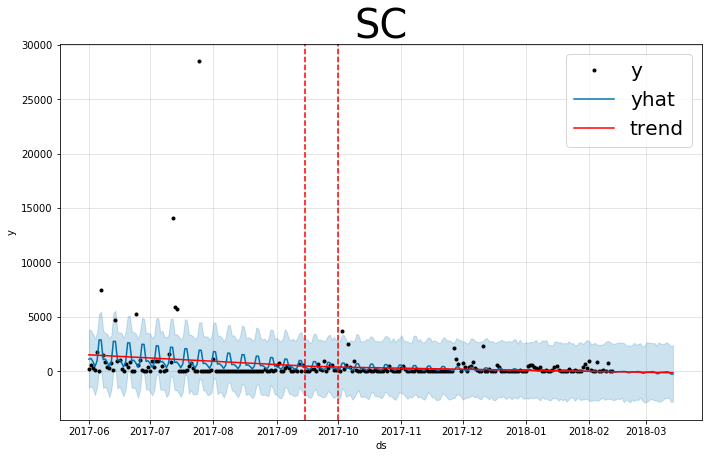

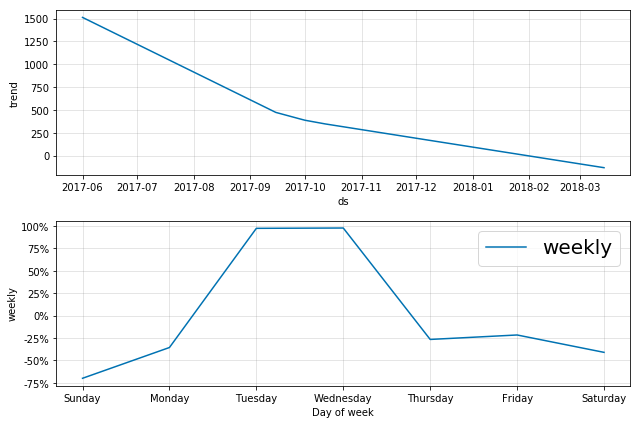

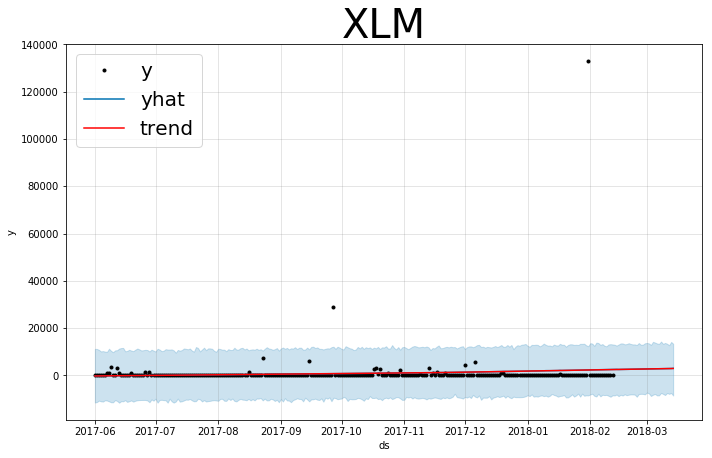

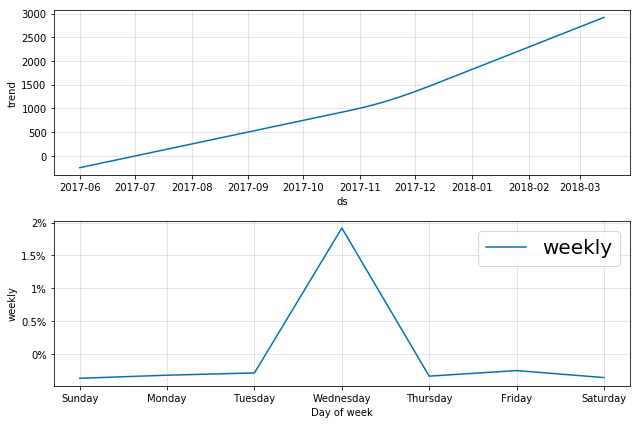

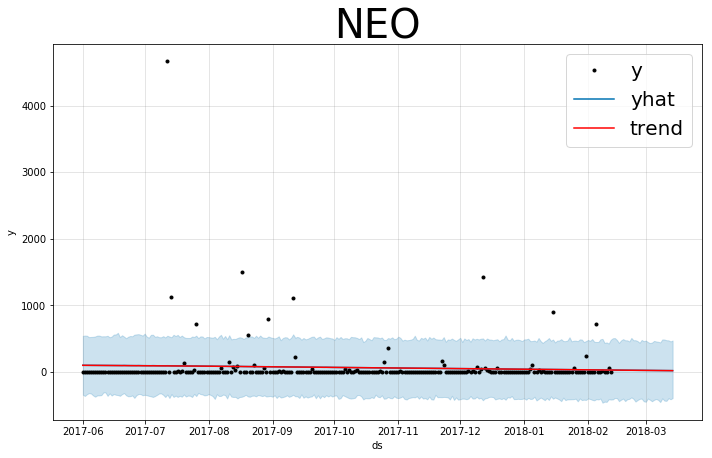

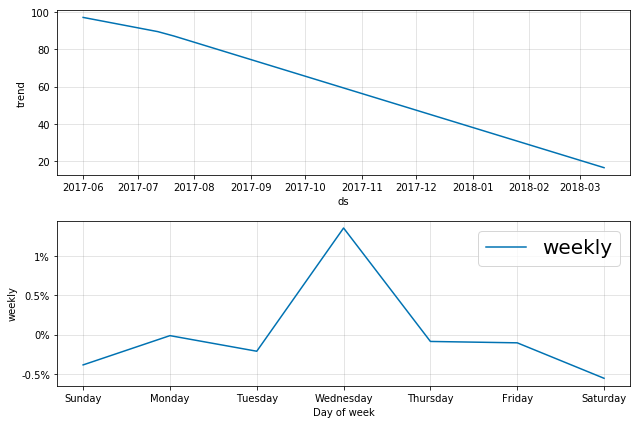

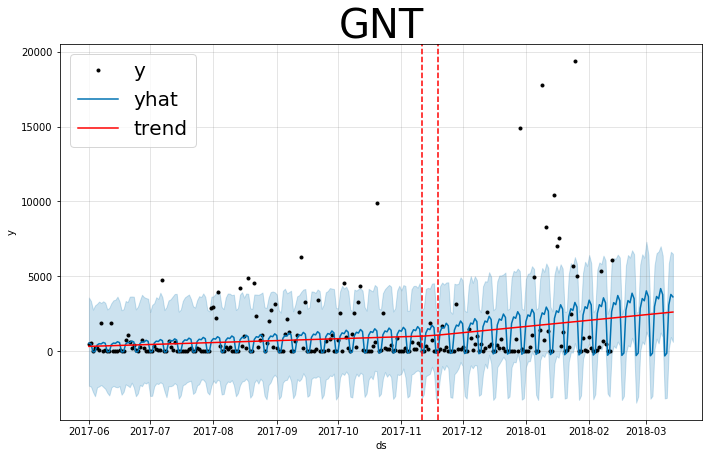

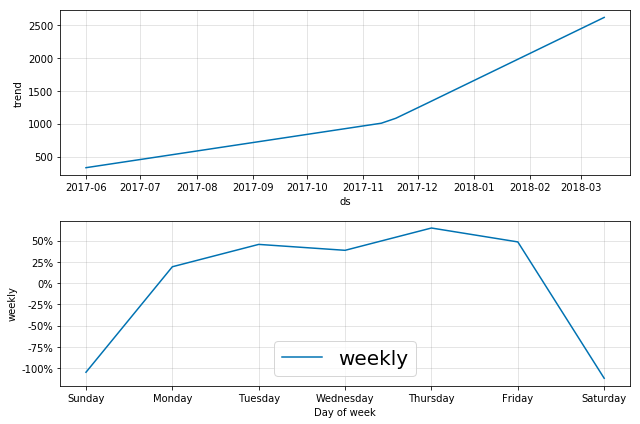

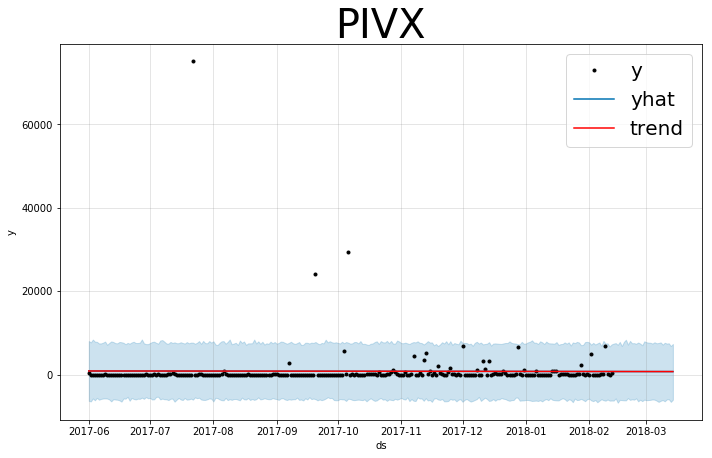

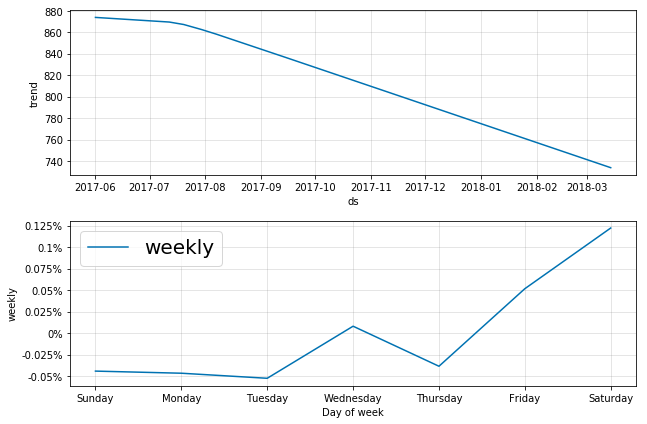

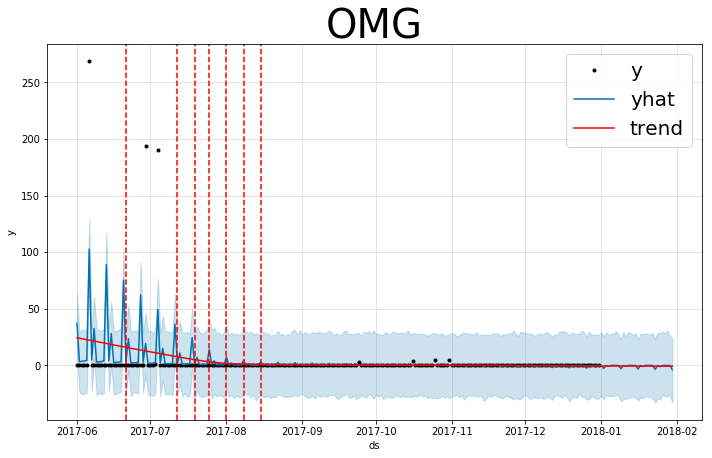

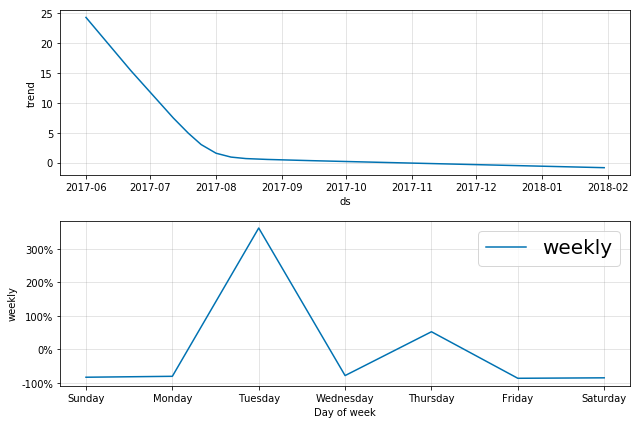

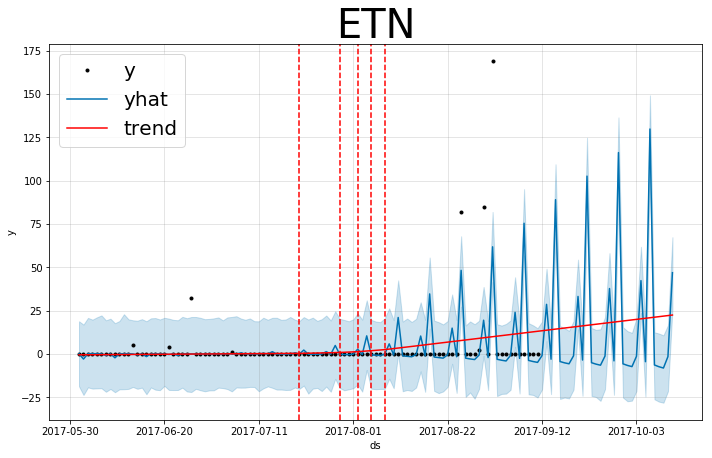

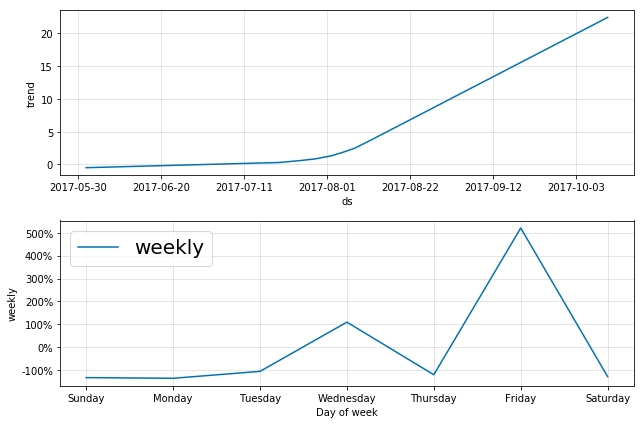

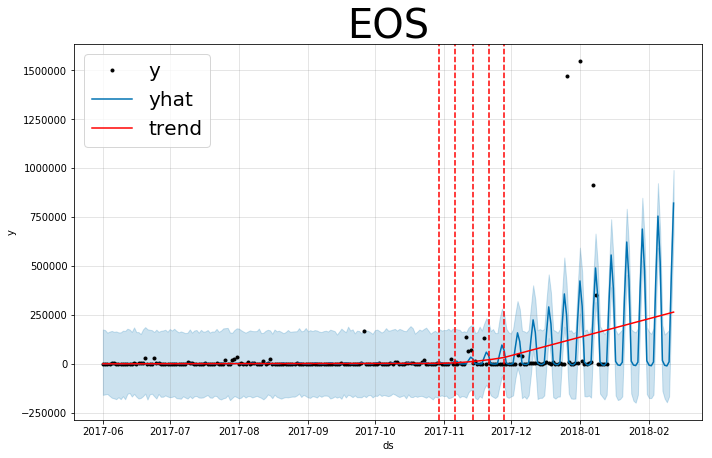

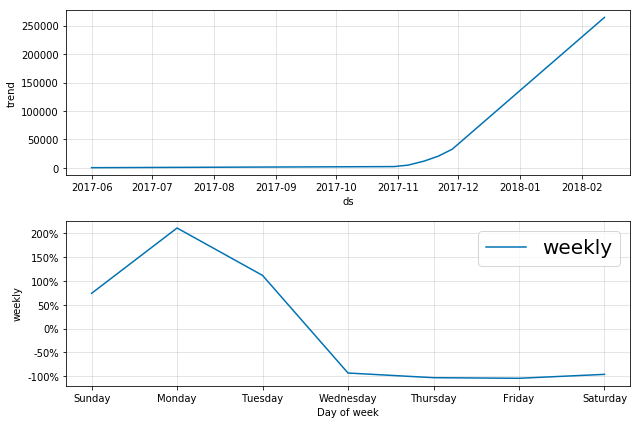

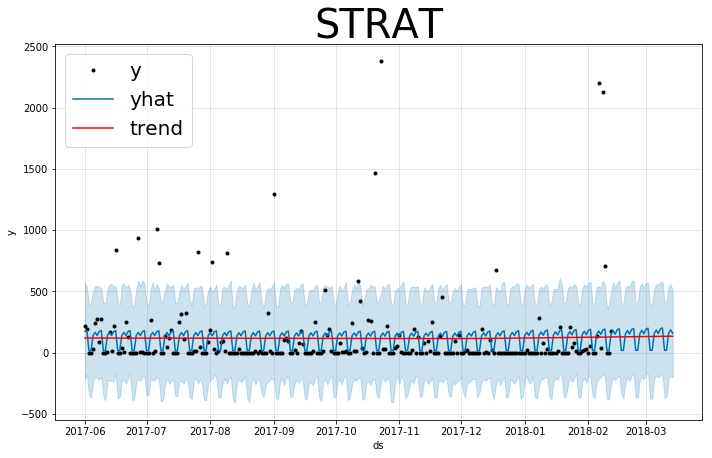

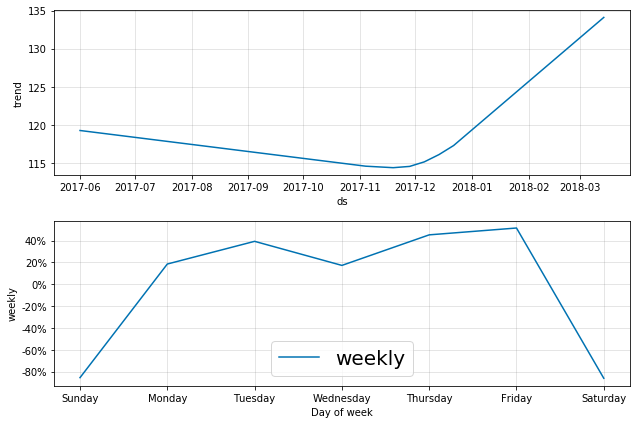

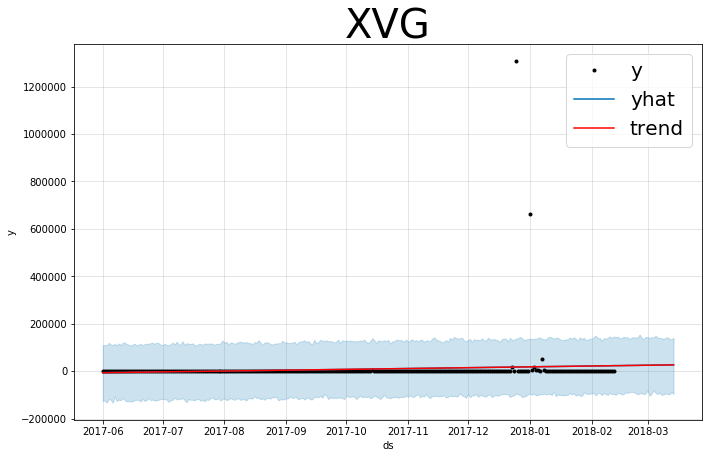

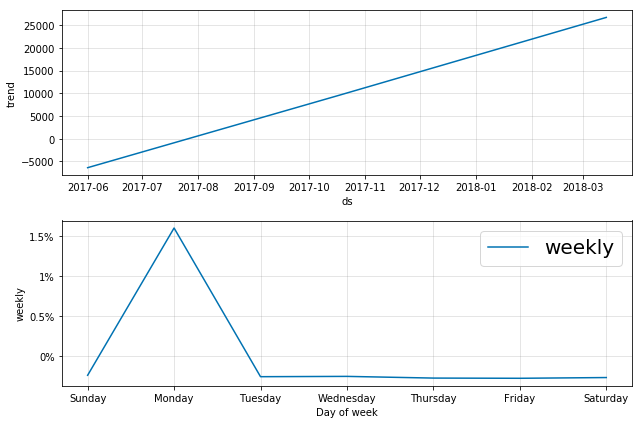

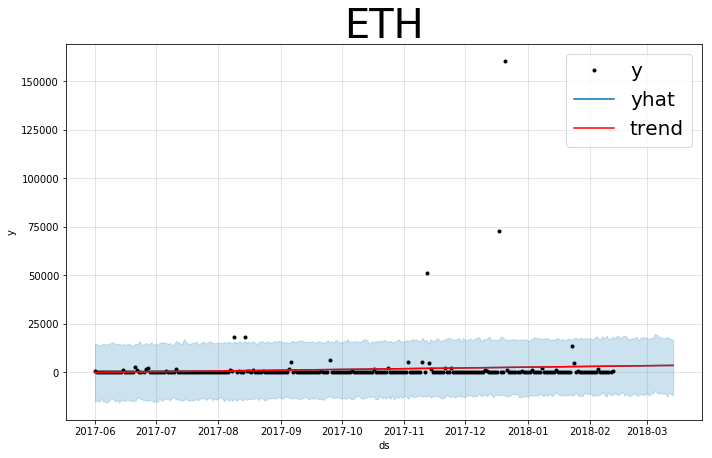

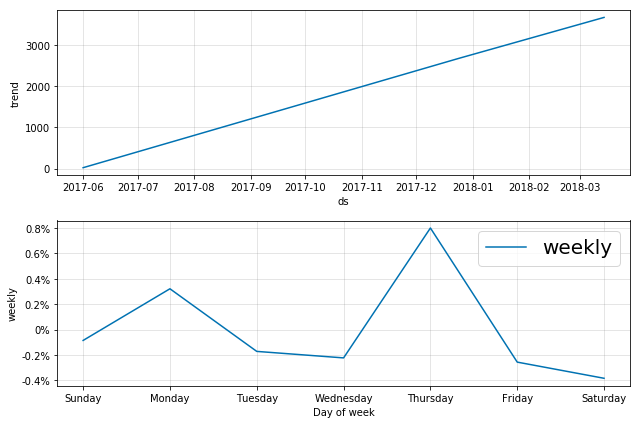

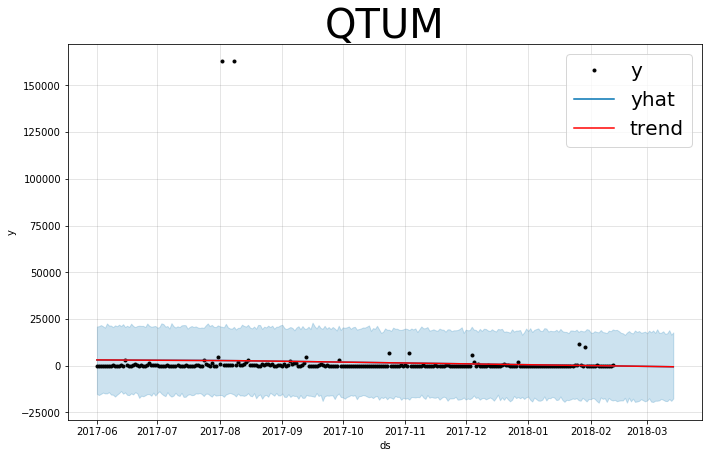

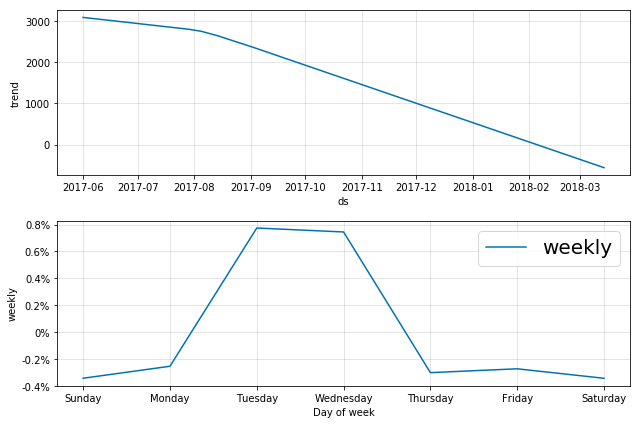

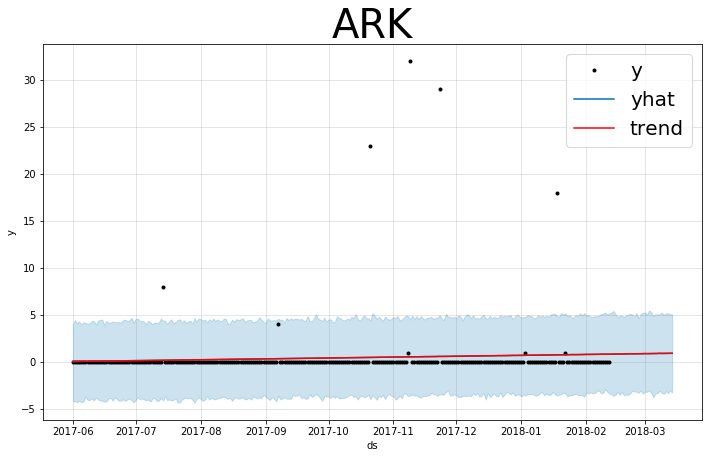

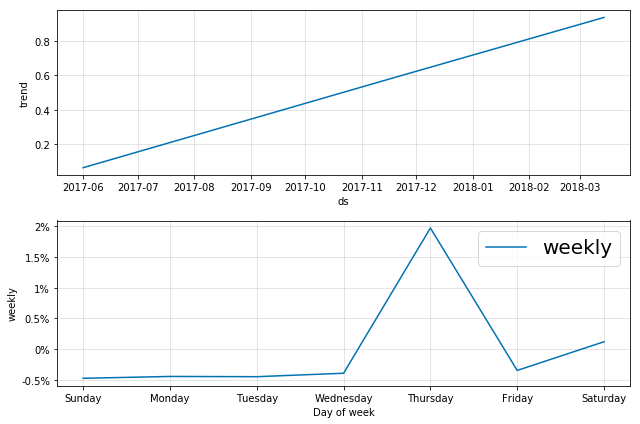

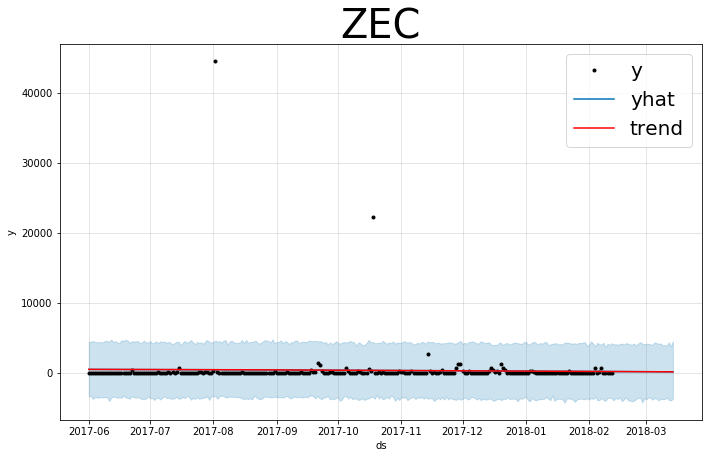

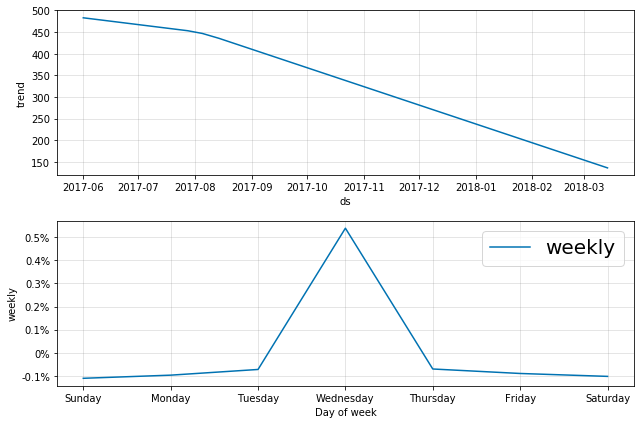

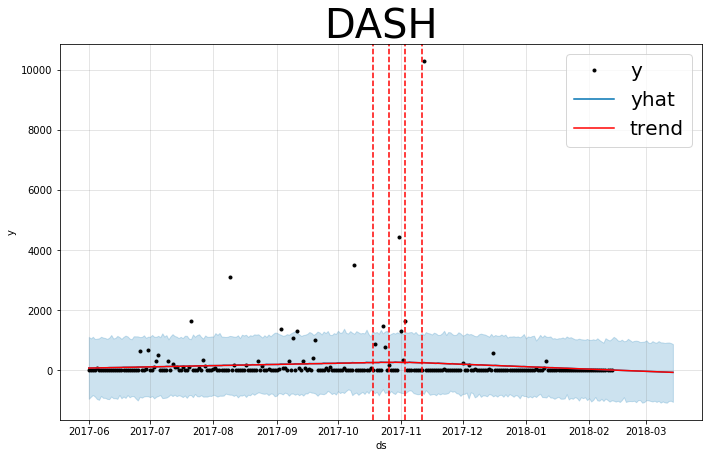

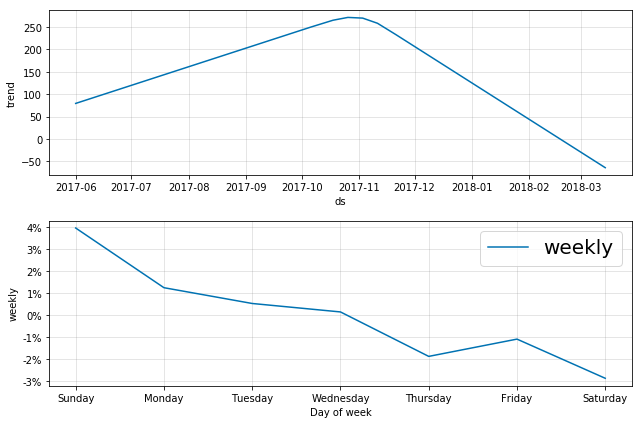

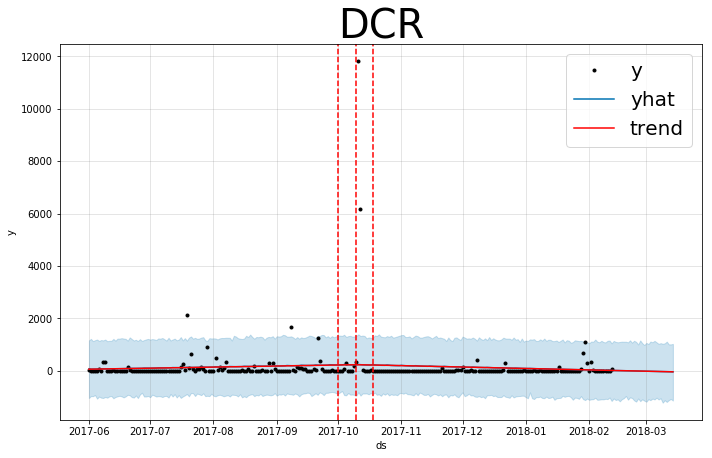

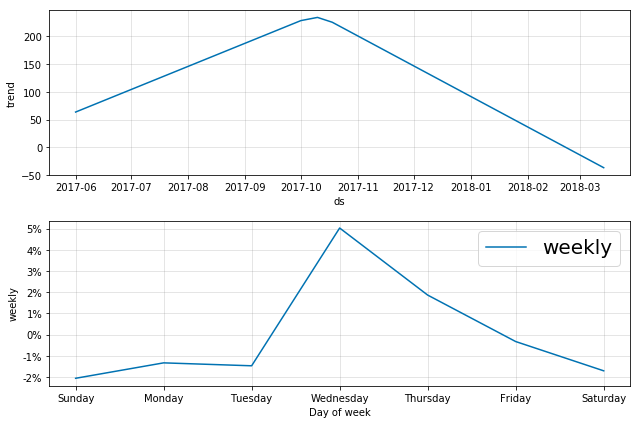

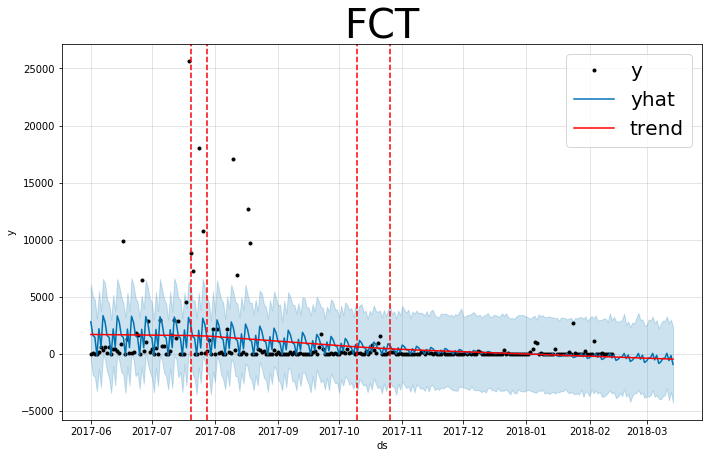

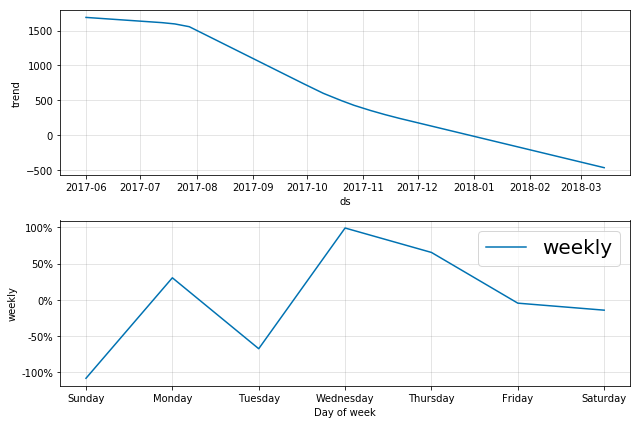

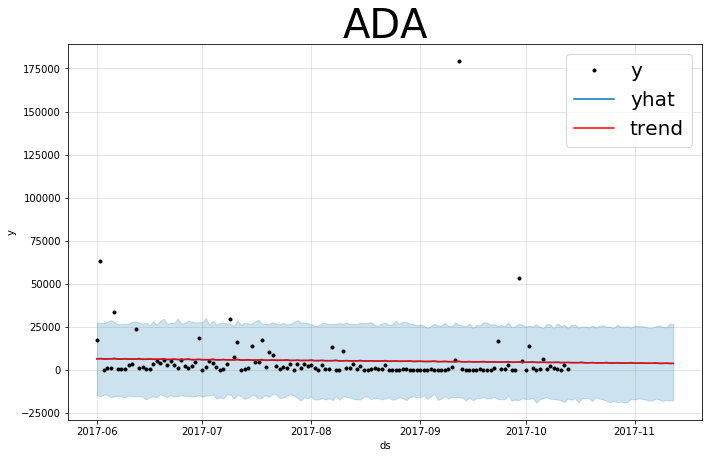

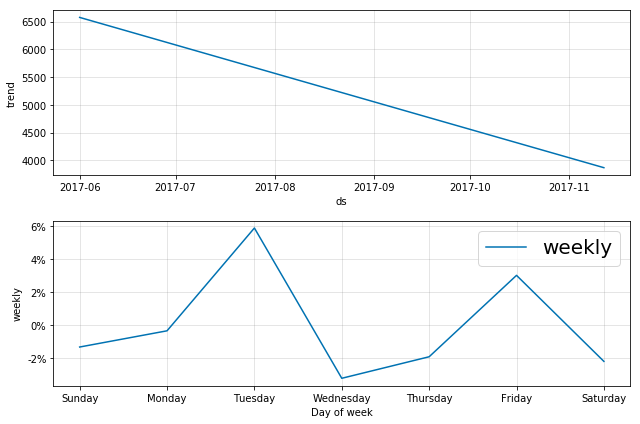

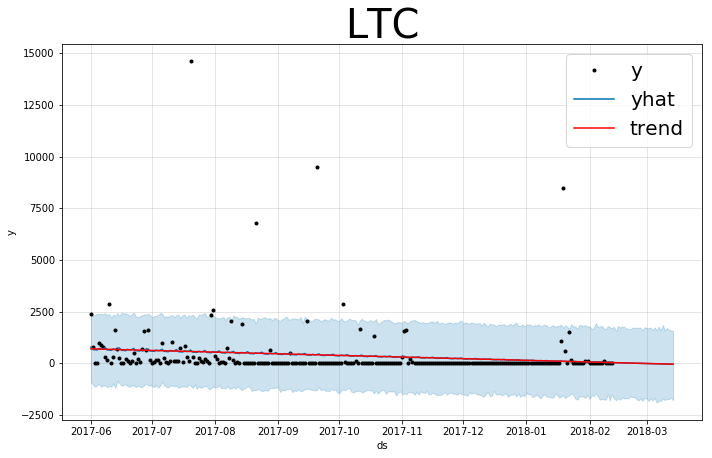

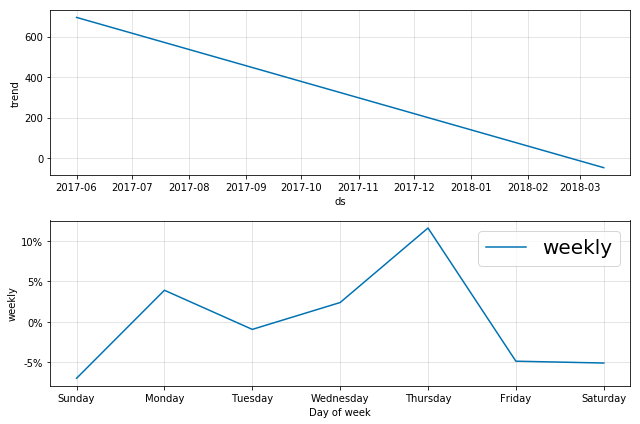

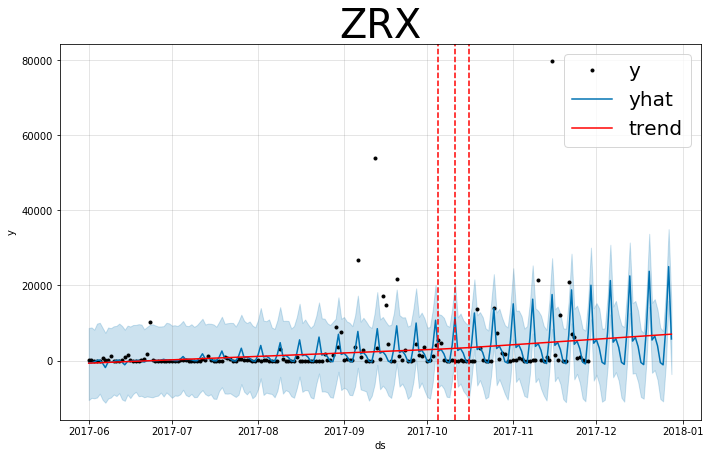

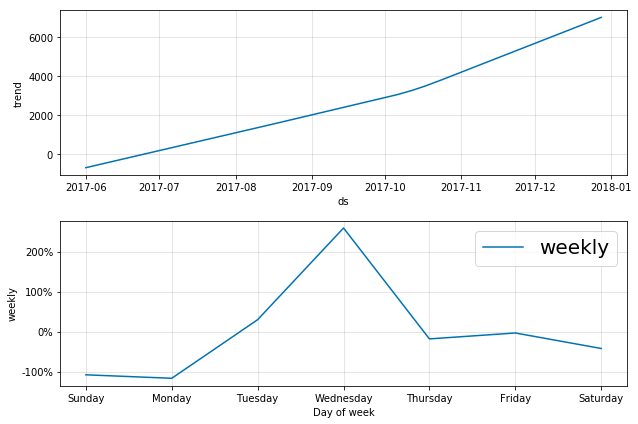

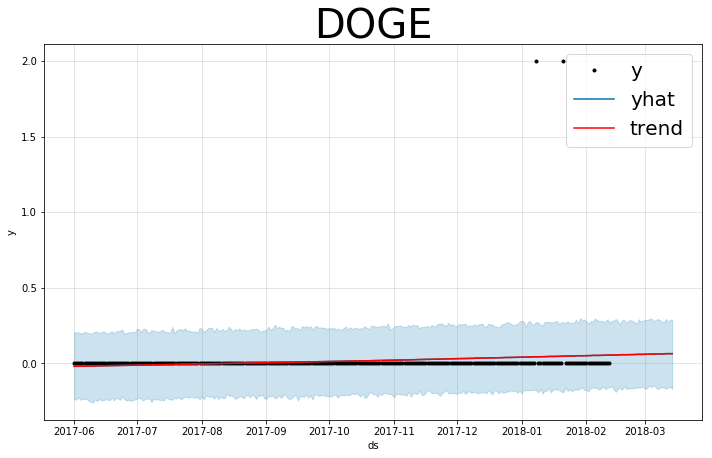

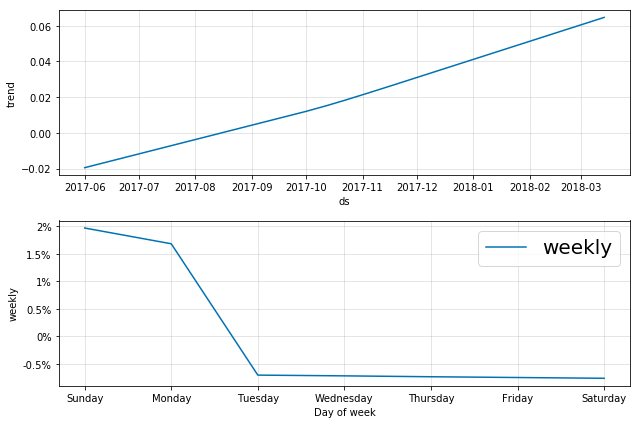

In [5]:
for coin, df in frames.items():
    df['y'] = df['commit_add_sum']
    
    prophet = Prophet(seasonality_mode='multiplicative')
    prophet.fit(df)
    
    #Build future, periods set to 30 because there are 30 days of data
    future = prophet.make_future_dataframe(periods=30)
    #Build Forecast
    forecast = prophet.predict(future)
    
    
    x = prophet.plot(forecast)
    a = add_changepoints_to_plot(x.gca(), prophet, forecast)
    plt.title(coin, fontsize=40)
    plt.legend(loc='best', fontsize=20)
    
    fig2 = prophet.plot_components(forecast,uncertainty=False)
    plt.legend(loc='best', fontsize=20)

# Autocorrelation and PACF plots

In [19]:
def plot_partial_lag(timeSeries, lag, coin):
    plot_pacf(timeSeries, lags=lag)
    rcParams['figure.figsize'] = 6,6
    plt.title(coin, fontsize=30)
    plt.show()    

LinAlgError: Singular matrix

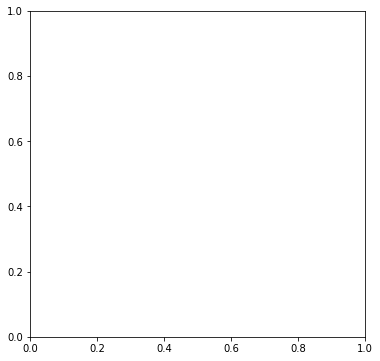

In [20]:
for coin, df in frames.items():
    plot_partial_lag(df['commit_add_sum'], 50, coin)